# Imports

Most of this first part is copied from the 'messing around' file, just condensing it and adding more graphs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
import scipy.fft

from itertools import cycle

# Importing Song Data

In [3]:
# Load in the data from the train folder
train_files = glob('train/*')
# play one of the files to test
ipd.Audio(train_files[0])

In [4]:
# Load the audio file using librosa
# y = audio time series
# sr = sampling rate of y
y, sr = librosa.load(train_files[0])
print(f'y: {y[:10]}')
# print the shape of y
print(f'shape y: {y.shape}')
# print the sample rate of the audio file
print(f'sr: {sr}')

y: [-0.14013672 -0.14840698 -0.06219482 -0.05166626 -0.14935303 -0.02609253
 -0.06506348 -0.12872314 -0.15667725 -0.19848633]
shape y: (661504,)
sr: 22050


# Displaying Time-Series Data of the Songs

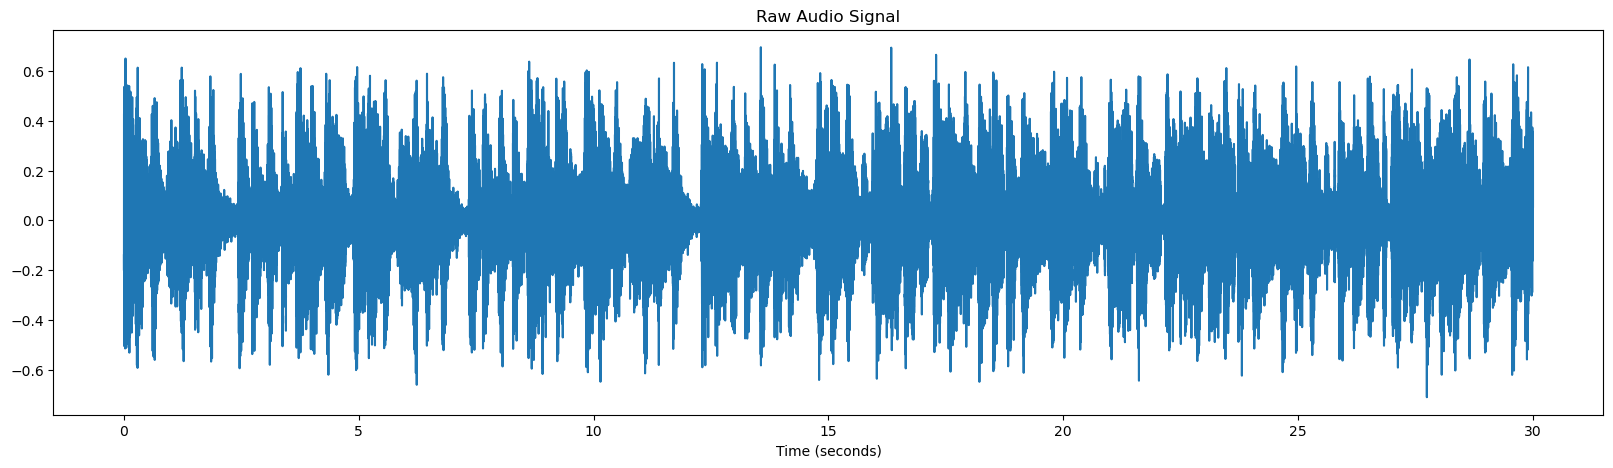

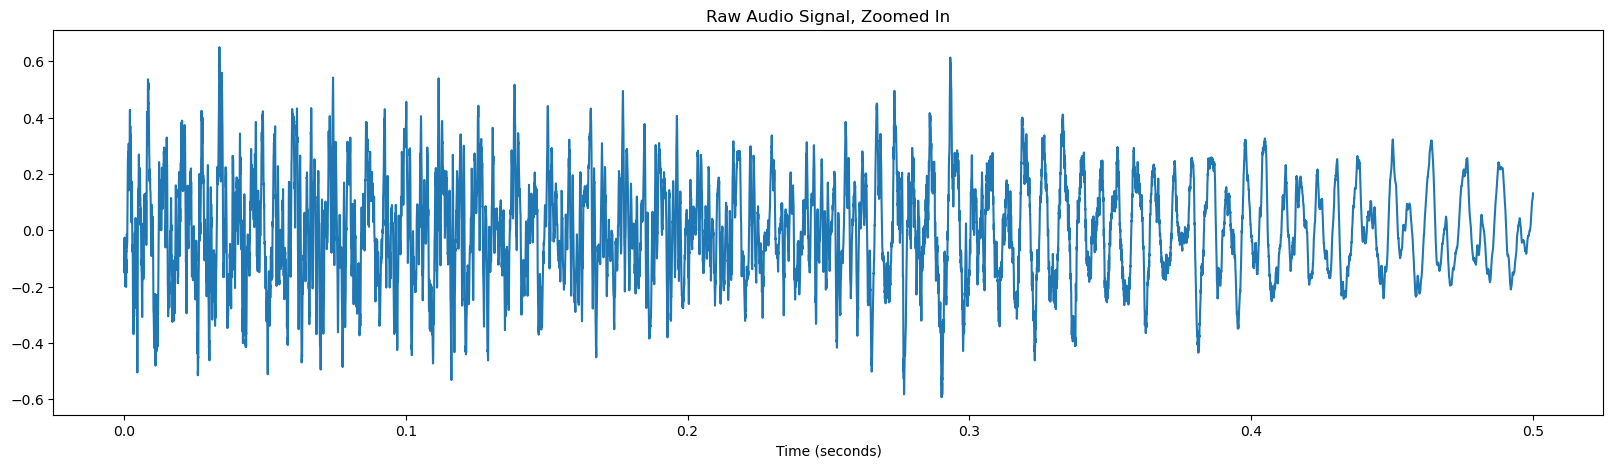

In [5]:
time_data = pd.Series(y)
time_seconds = [x/sr for x in range(y.shape[0])]

plt.figure(figsize=(20,5), linewidth=.05)
plt.title("Raw Audio Signal")
plt.xlabel("Time (seconds)")
plt.plot(time_seconds, time_data)
plt.savefig("./visualizations/raw-audio-signal-time-series")
plt.show()

plt.figure(figsize=(20,5), linewidth=.05)
plt.title("Raw Audio Signal, Zoomed In")
plt.xlabel("Time (seconds)")
plt.plot(time_seconds[:sr//2], time_data[:sr//2])
plt.savefig("./visualizations/raw-audio-signal-time-series-zoomed")
plt.show()

# Frequency-Domain Song Representations

## Fourier Transform

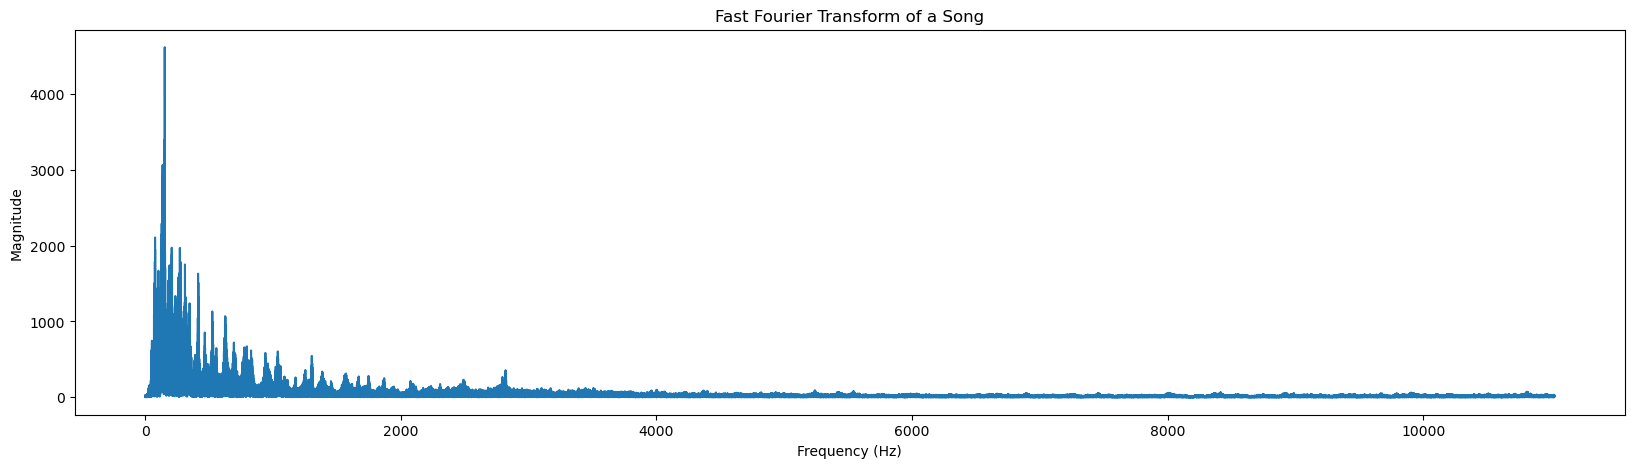

In [6]:
fft = np.fft.fft(y)
magnitude = np.abs(fft)
mag_db = librosa.amplitude_to_db(np.abs(magnitude), ref=np.max)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.figure(figsize=(20,5), linewidth=.05)
plt.title("Fast Fourier Transform of a Song")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.plot(left_frequency, left_magnitude)
plt.savefig("./visualizations/fast-fourier-transform")
plt.show()

## Spectrogram

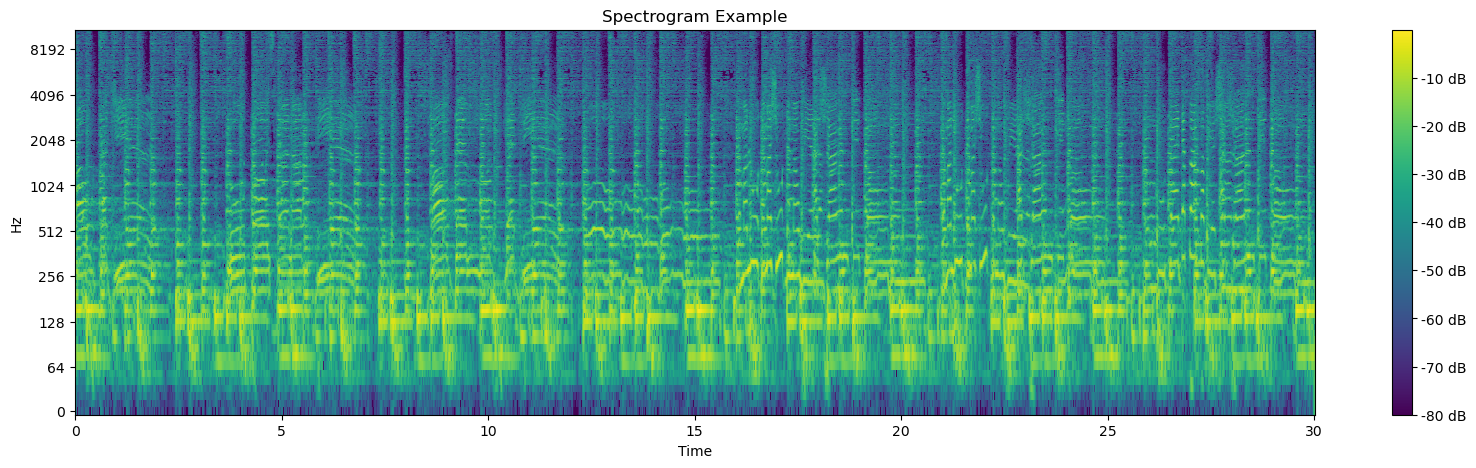

In [49]:
# compute the short-time Fourier transform of the audio signal
D = librosa.stft(y)

# convert the amplitude to decibels
Db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(Db, x_axis='time', y_axis='log', sr=sr, ax=ax, cmap="viridis")
ax.set_title('Spectrogram Example')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig("./visualizations/song-spectrogram")
plt.show()

## Mel Spectrogram

The mel spectrogram, based on the auditory-based mel-frequency scale, provides better resolution for lower frequencies than the normal spectrogram

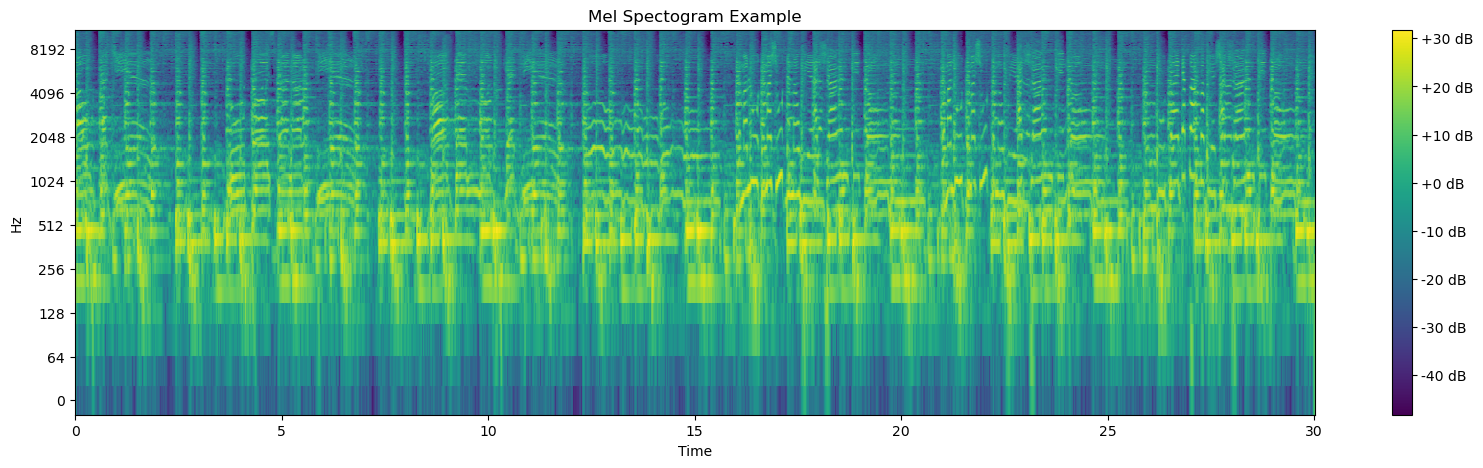

In [48]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)
mel_spec_db = librosa.power_to_db(mel_spec)

fig, ax = plt.subplots(figsize=(20, 5))
# Plot the mel spectogram
img = librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='log', ax=ax, sr=sr, cmap="viridis")
ax.set_title('Mel Spectogram Example')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig("./visualizations/song-mel-spectrogram")
plt.show()

# Basic Feature Extraction Visualization

## Spectral Centroid

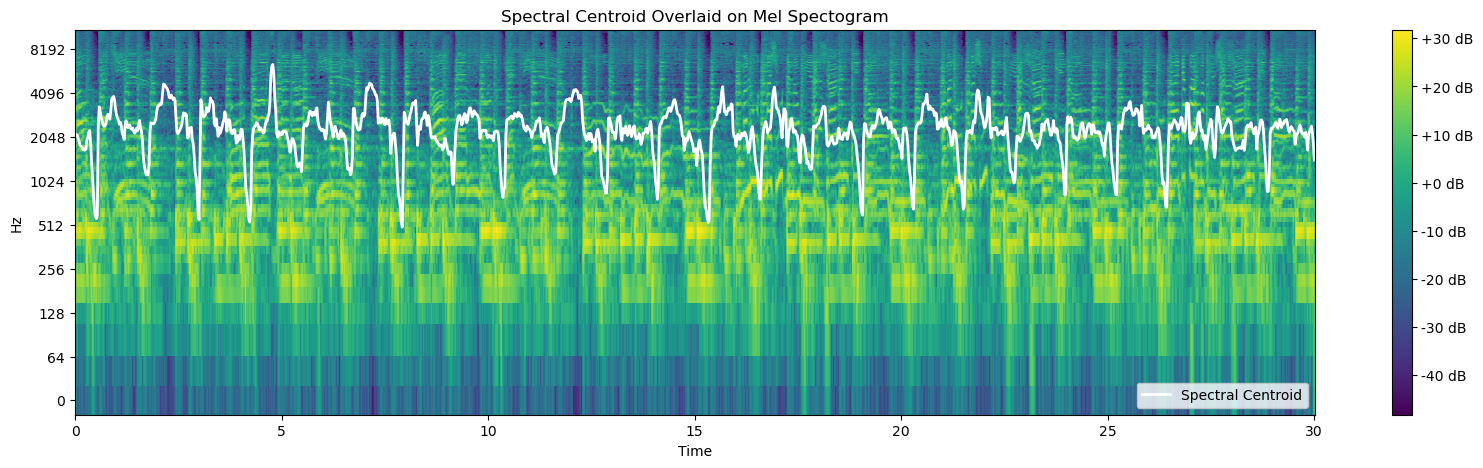

In [47]:
f = librosa.feature.spectral_centroid(y=y, sr=sr)
times = librosa.times_like(f)

fig, ax = plt.subplots(figsize=(20, 5))
# Plot the mel spectogram
img = librosa.display.specshow(mel_spec_db,x_axis='time',y_axis='log',ax=ax, sr=sr, cmap='viridis')
ax.set_title('Spectral Centroid Overlaid on Mel Spectogram')
ax.plot(times, f.T, label='Spectral Centroid', color='w', linewidth=2)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
ax.legend(loc='lower right')
plt.savefig("./visualizations/spectral-centroid-mel-spectrogram")
plt.show()

## Spectral Rolloff

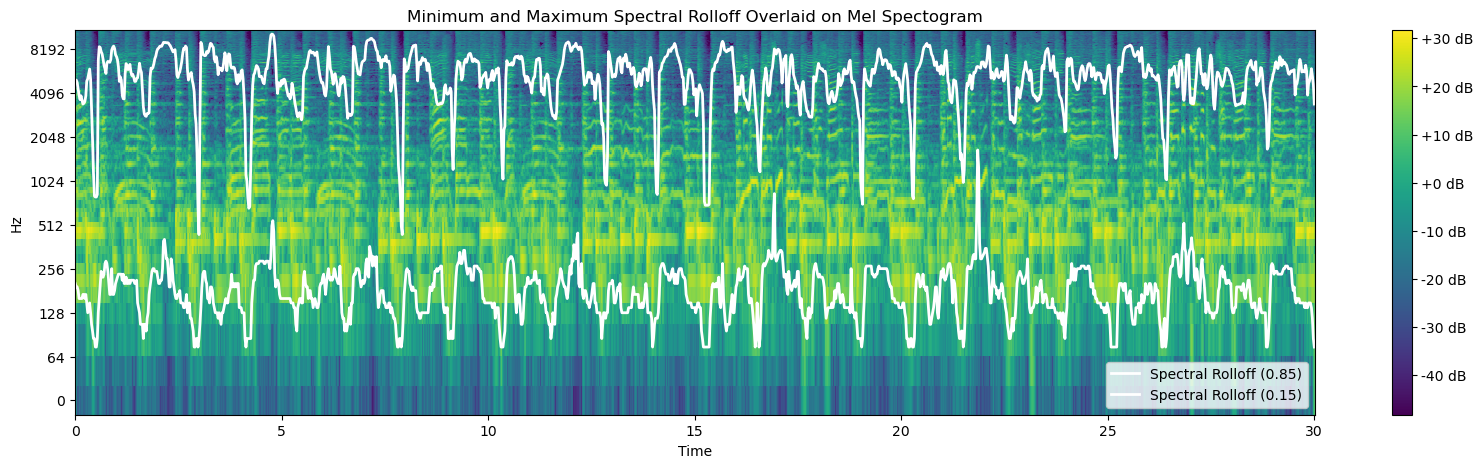

In [46]:
rolloff_max = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.15)
times = librosa.times_like(f)

fig, ax = plt.subplots(figsize=(20, 5))
# Plot the mel spectogram
img = librosa.display.specshow(mel_spec_db,x_axis='time',y_axis='log',ax=ax, sr=sr, cmap='viridis')
ax.set_title('Minimum and Maximum Spectral Rolloff Overlaid on Mel Spectogram')
ax.plot(times, rolloff_max.T, label='Spectral Rolloff (0.85)', color='white', linewidth=2)
ax.plot(times, rolloff_min.T, label='Spectral Rolloff (0.15)', color='white', linewidth=2)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
ax.legend(loc='lower right')
plt.savefig("./visualizations/spectral-rolloff-mel-spectrogram")
plt.show()

## Spectral Contrast

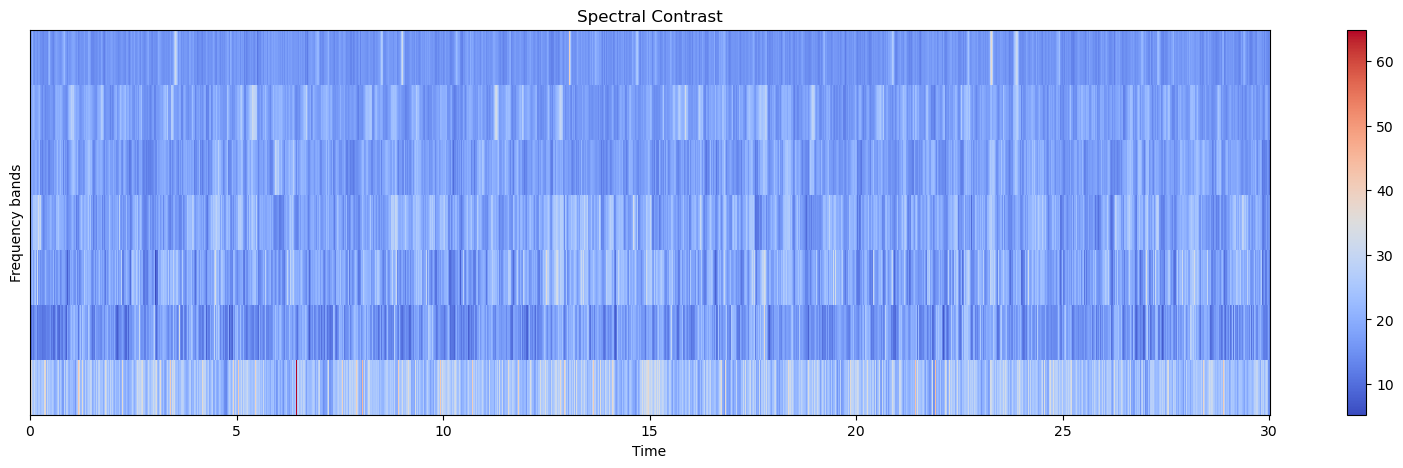

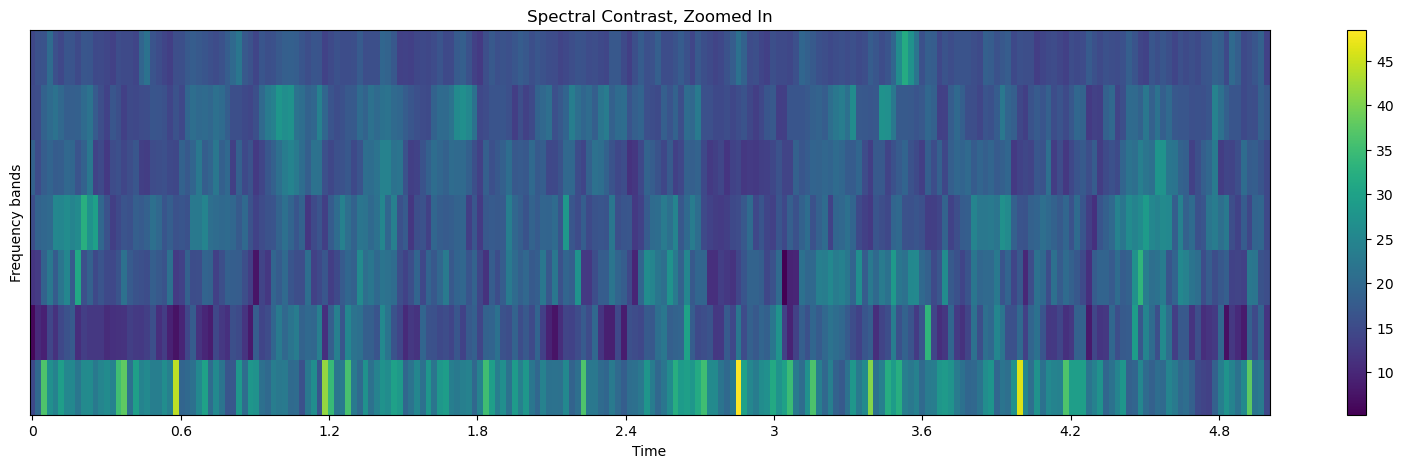

In [44]:
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

fig, ax = plt.subplots(figsize=(20, 5))
#img1 = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time', ax=ax[0])
#fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
#ax[0].set(title='Power spectrogram')
#ax[0].label_outer()

img2 = librosa.display.specshow(contrast, x_axis='time',cmap='coolwarm')
fig.colorbar(img2)
ax.set(ylabel='Frequency bands', title='Spectral Contrast')
plt.savefig("./visualizations/spectral-contrast")
plt.show()


contrast = librosa.feature.spectral_contrast(y=y[:sr*5], sr=sr)
fig, ax = plt.subplots(figsize=(20, 5))
img2 = librosa.display.specshow(contrast, x_axis='time',cmap='viridis')
fig.colorbar(img2)
ax.set(ylabel='Frequency bands', title='Spectral Contrast, Zoomed In')
plt.savefig("./visualizations/spectral-contrast-zoomed")
plt.show()

## Spectral Flatness

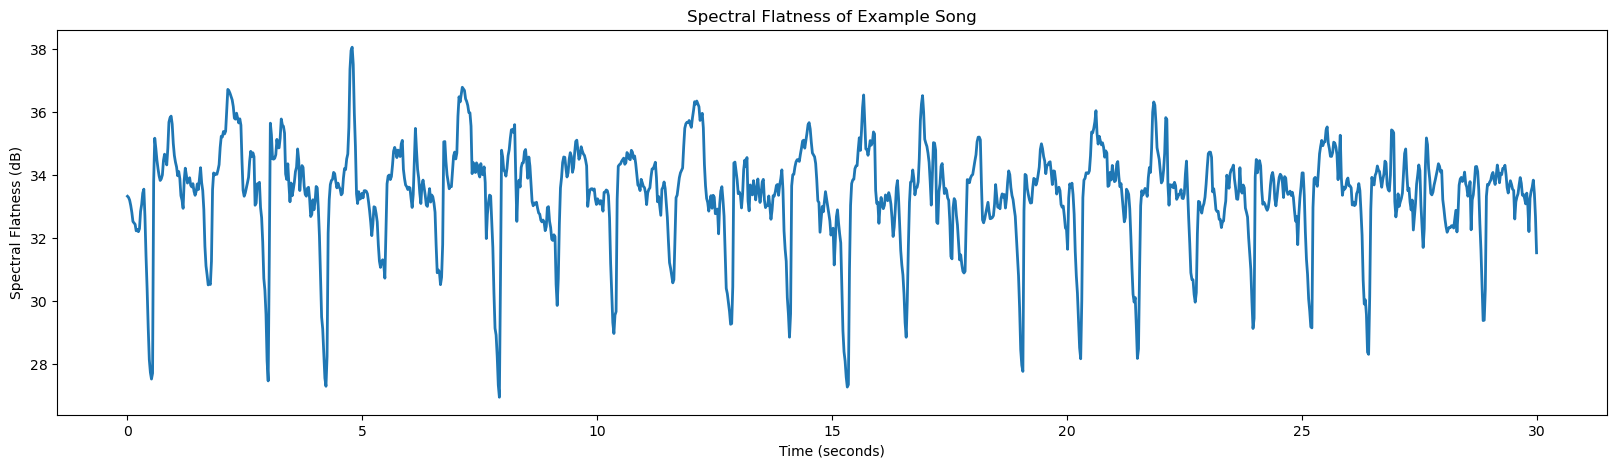

In [13]:
flatness = librosa.feature.spectral_centroid(y=y, sr=sr)
flatness_db = librosa.power_to_db(flatness)
times = librosa.times_like(flatness)

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Spectral Flatness of Example Song')
ax.plot(times, flatness_db.T, label='Spectral Flatness', color='tab:blue', linewidth=2)
ax.set_ylabel('Spectral Flatness (dB)')
ax.set_xlabel('Time (seconds)')
plt.savefig("./visualizations/spectral-flatness")
plt.show()

## Spectral Bandwidth

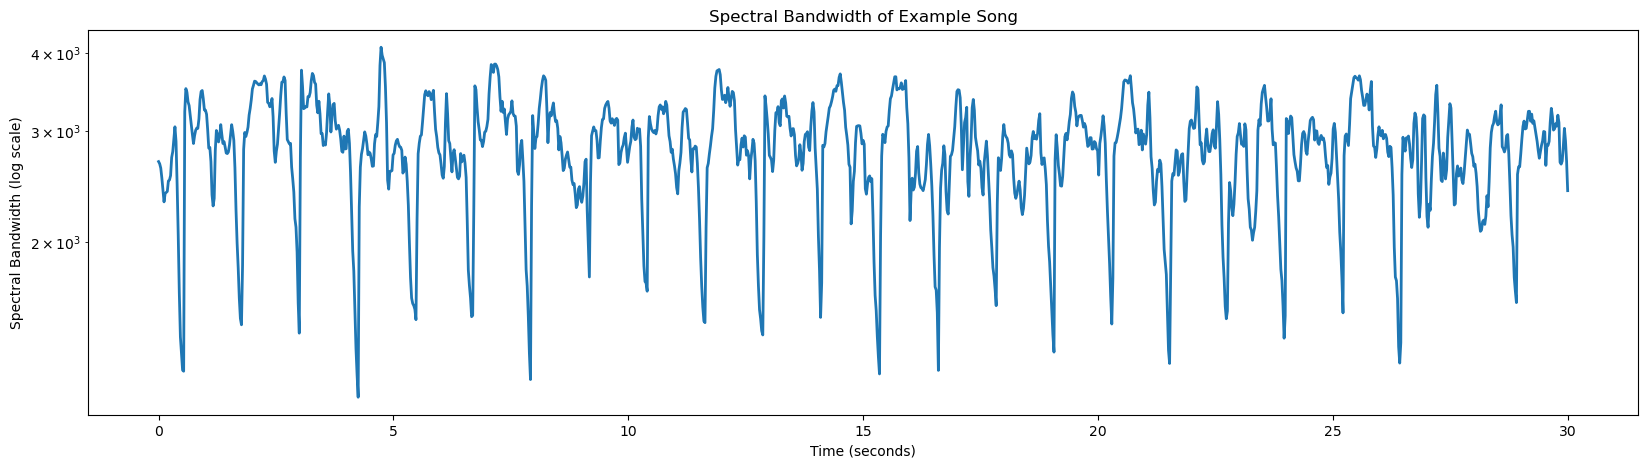

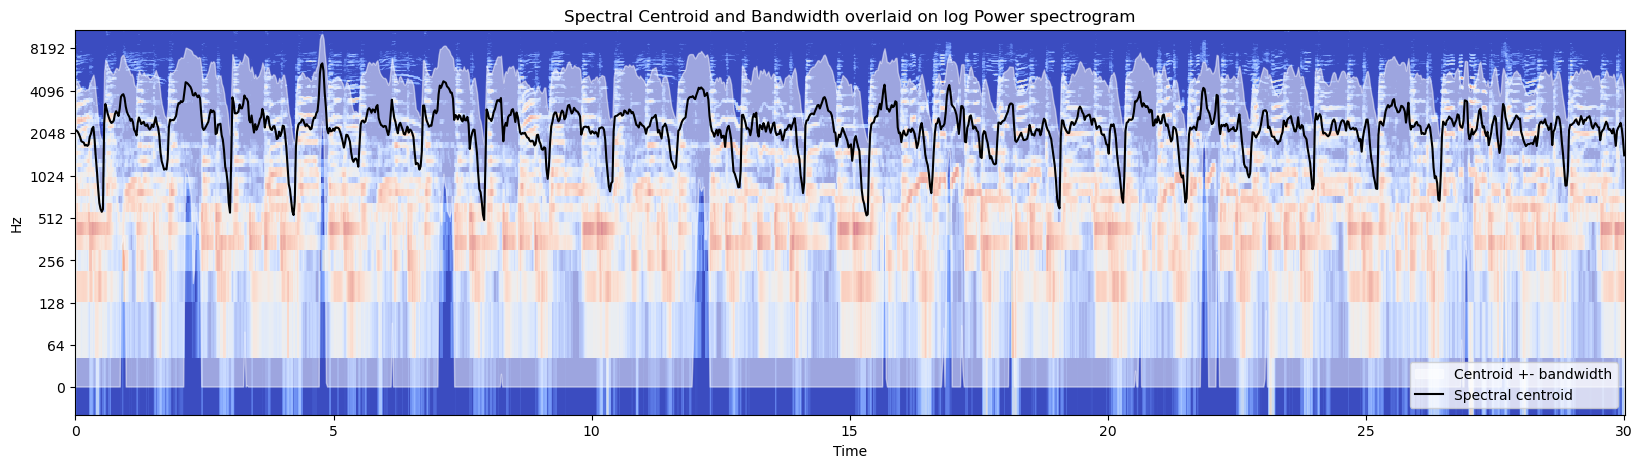

In [25]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
times = librosa.times_like(spec_bw)

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Spectral Bandwidth of Example Song')
ax.semilogy(times, spec_bw[0], label='Spectral Bandwidth', color='tab:blue', linewidth=2)
ax.set_ylabel('Spectral Bandwidth (log scale)')
ax.set_xlabel('Time (seconds)')
plt.savefig("./visualizations/spectral-bandwidth")
plt.show()

centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
fig, ax = plt.subplots(figsize=(20, 5))
librosa.display.specshow(librosa.amplitude_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max),
                         y_axis='log', x_axis='time', ax=ax, cmap='coolwarm')
ax.set(title='Spectral Centroid and Bandwidth overlaid on log Power spectrogram')
ax.fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, color='white', label='Centroid +- bandwidth')
ax.plot(times, centroid[0], label='Spectral centroid', color='black')
ax.legend(loc='lower right')
plt.savefig("./visualizations/spectral-bandwidth-centroid-log-power-spectrogram")
plt.show()


## RMS

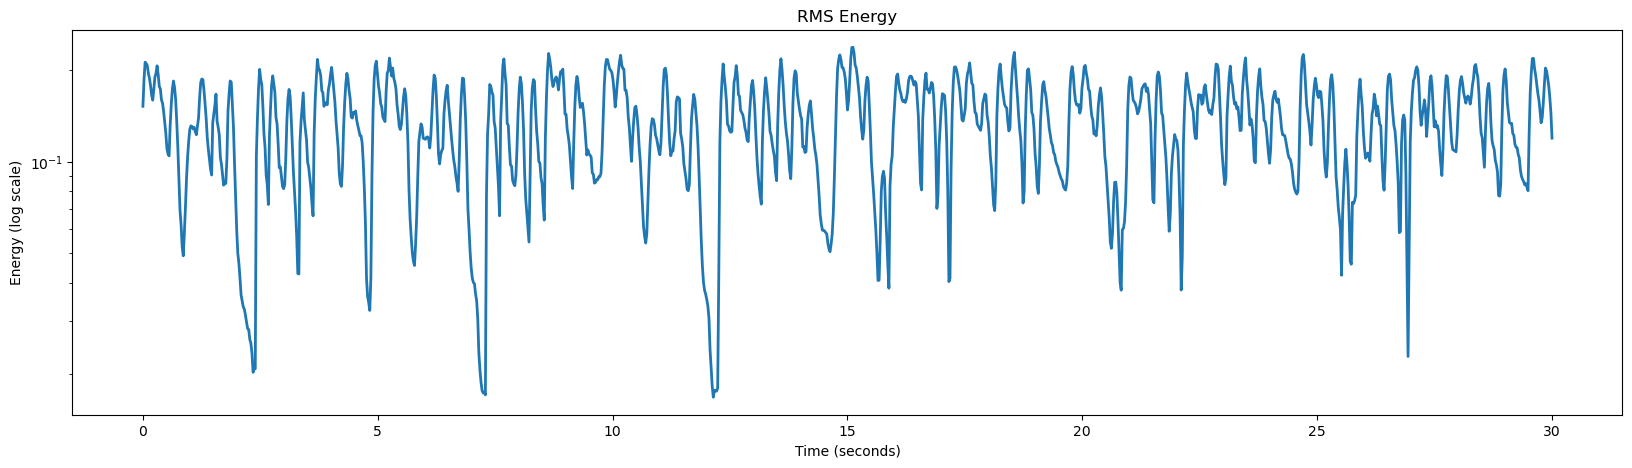

In [26]:
rms = librosa.feature.rms(y=y)
times = librosa.times_like(flatness)

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('RMS Energy')
ax.semilogy(times, rms.T, label='RMS Energy', color='tab:blue', linewidth=2)
ax.set_ylabel('Energy (log scale)')
ax.set_xlabel('Time (seconds)')
plt.savefig("./visualizations/rms")
plt.show()

## Onset Env

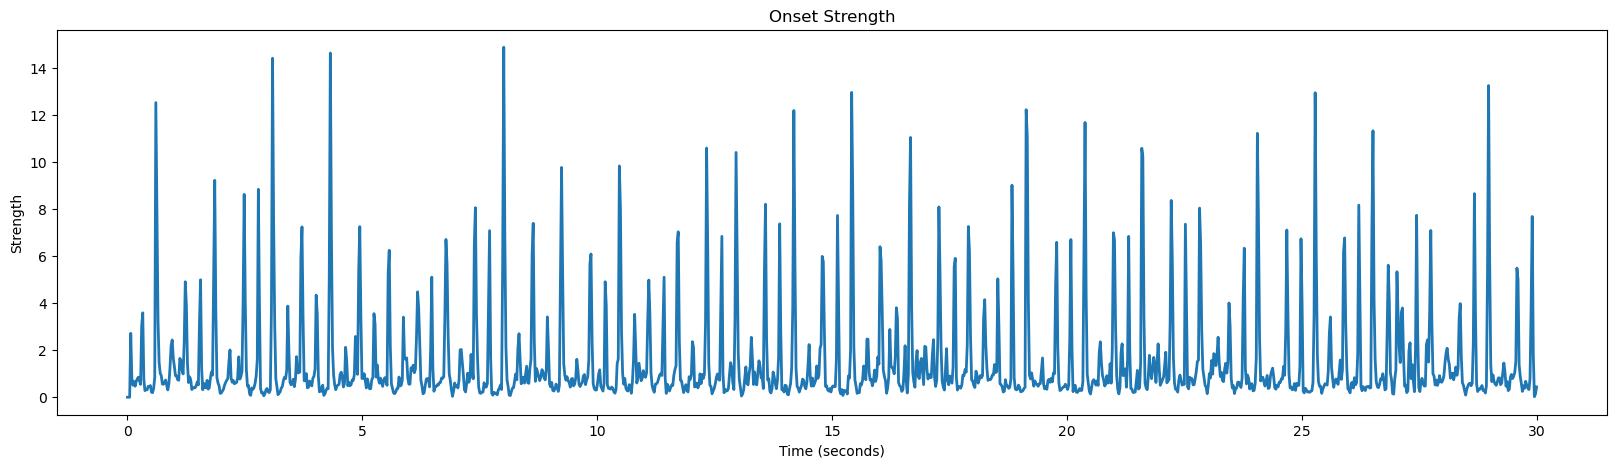

In [27]:
onset_env = librosa.onset.onset_strength(y=y)
times = librosa.times_like(onset_env)

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Onset Strength')
ax.plot(times, onset_env.T, label='Onset Strength', color='tab:blue', linewidth=2)
ax.set_ylabel('Strength')
ax.set_xlabel('Time (seconds)')
plt.savefig("./visualizations/onset-env")
plt.show()

## Beat Strengths

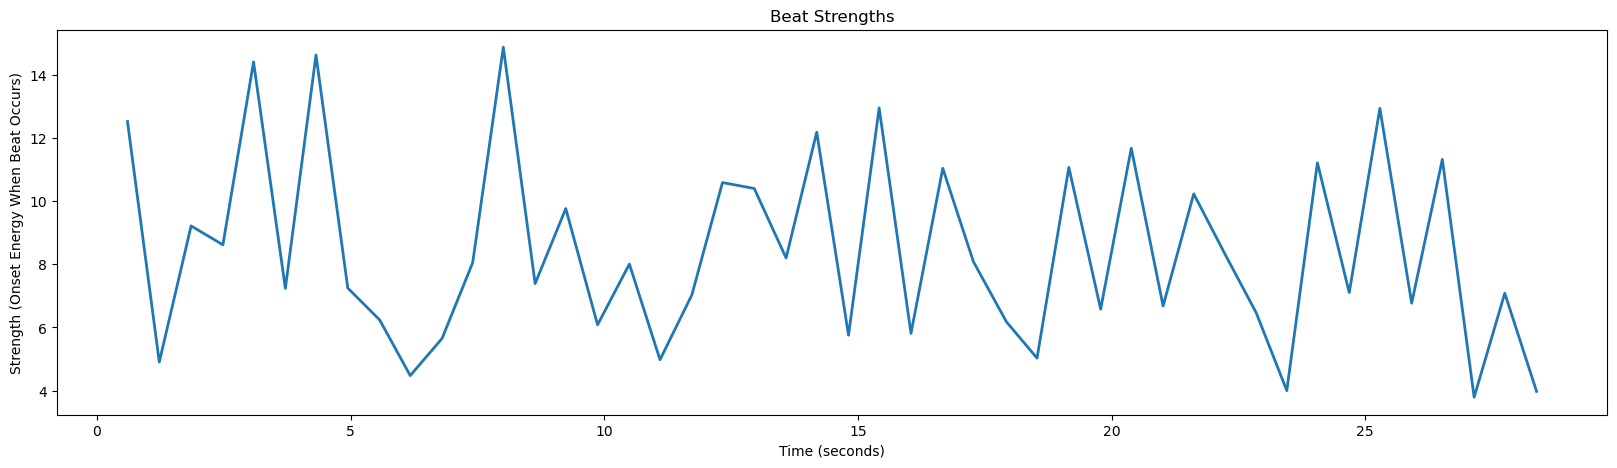

In [28]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
beat_strengths = onset_env[beats]
times_beats = times[beats]

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Beat Strengths')
ax.plot(times_beats, beat_strengths.T, color='tab:blue', linewidth=2)
ax.set_ylabel('Strength (Onset Energy When Beat Occurs)')
ax.set_xlabel('Time (seconds)')
plt.savefig("./visualizations/beat-strength-over-time")
plt.show()

## Chroma STFT

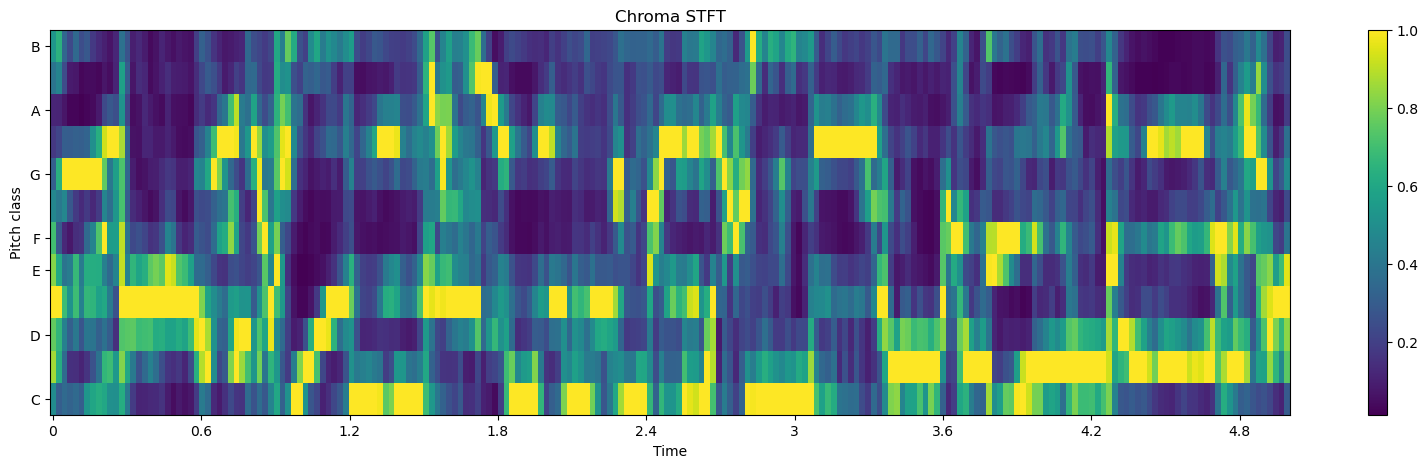

In [43]:
chroma = librosa.feature.chroma_stft(y=y[:sr*5], sr=sr)

fig, ax = plt.subplots(figsize=(20,5))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax, cmap='viridis')
fig.colorbar(img, ax=ax)
ax.set_title("Chroma STFT")
plt.savefig("./visualizations/chroma-stft")
plt.show()

## Mel Frequency Cepstral Coefficients

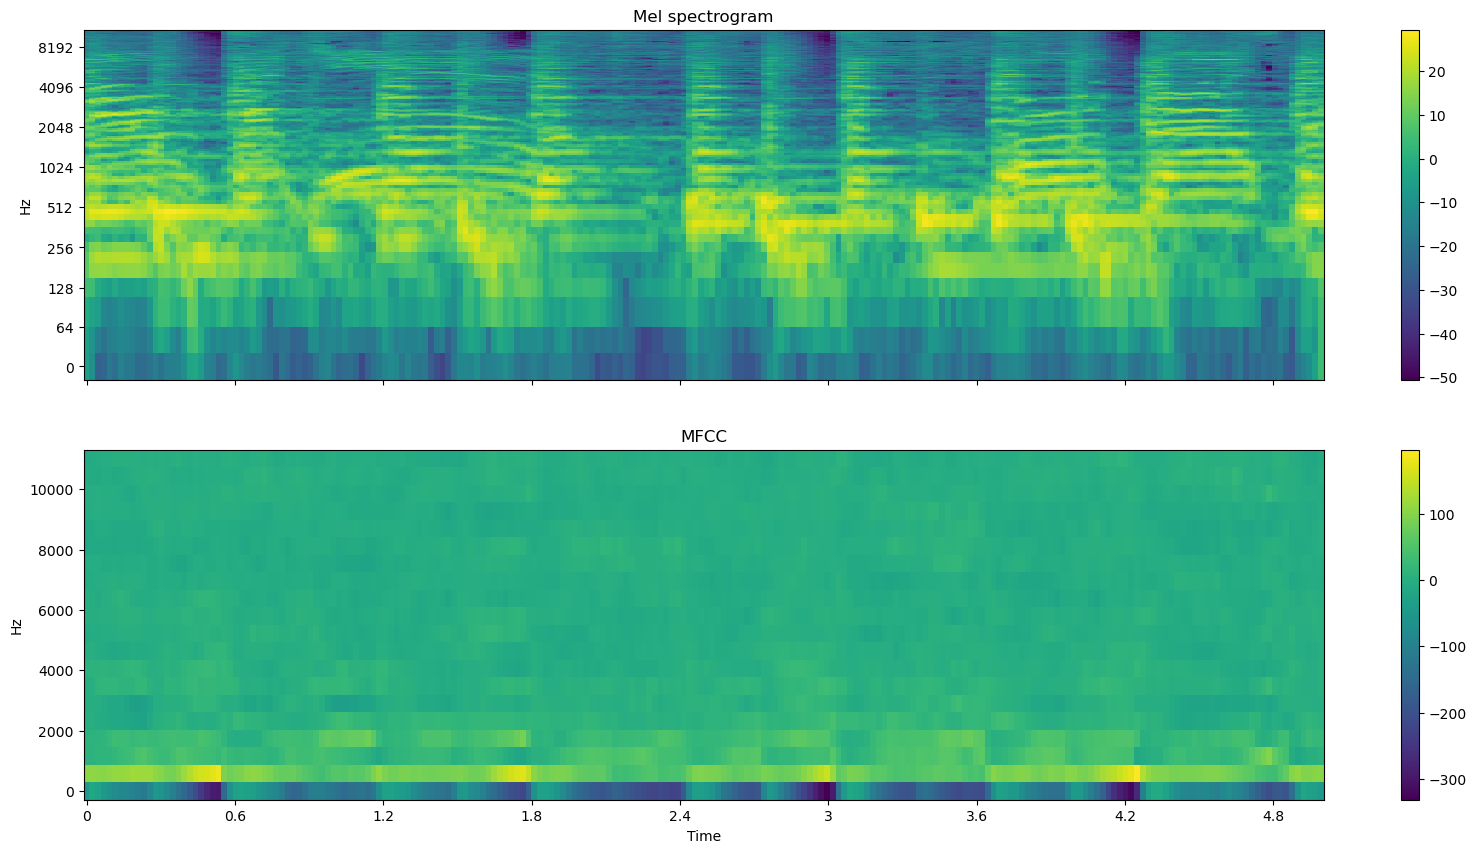

In [42]:
mfccs = librosa.feature.mfcc(y=y[:sr*5], sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
img = librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(y=y[:sr*5], sr=sr, n_mels=128 * 2)),x_axis='time', y_axis='log', fmax=8000, ax=ax[0], cmap='viridis')
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', y_axis='linear', ax=ax[1], cmap='viridis')
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

plt.savefig("./visualizations/mfcc-with-mel-spectrogram")
plt.show()

## Tonnetz

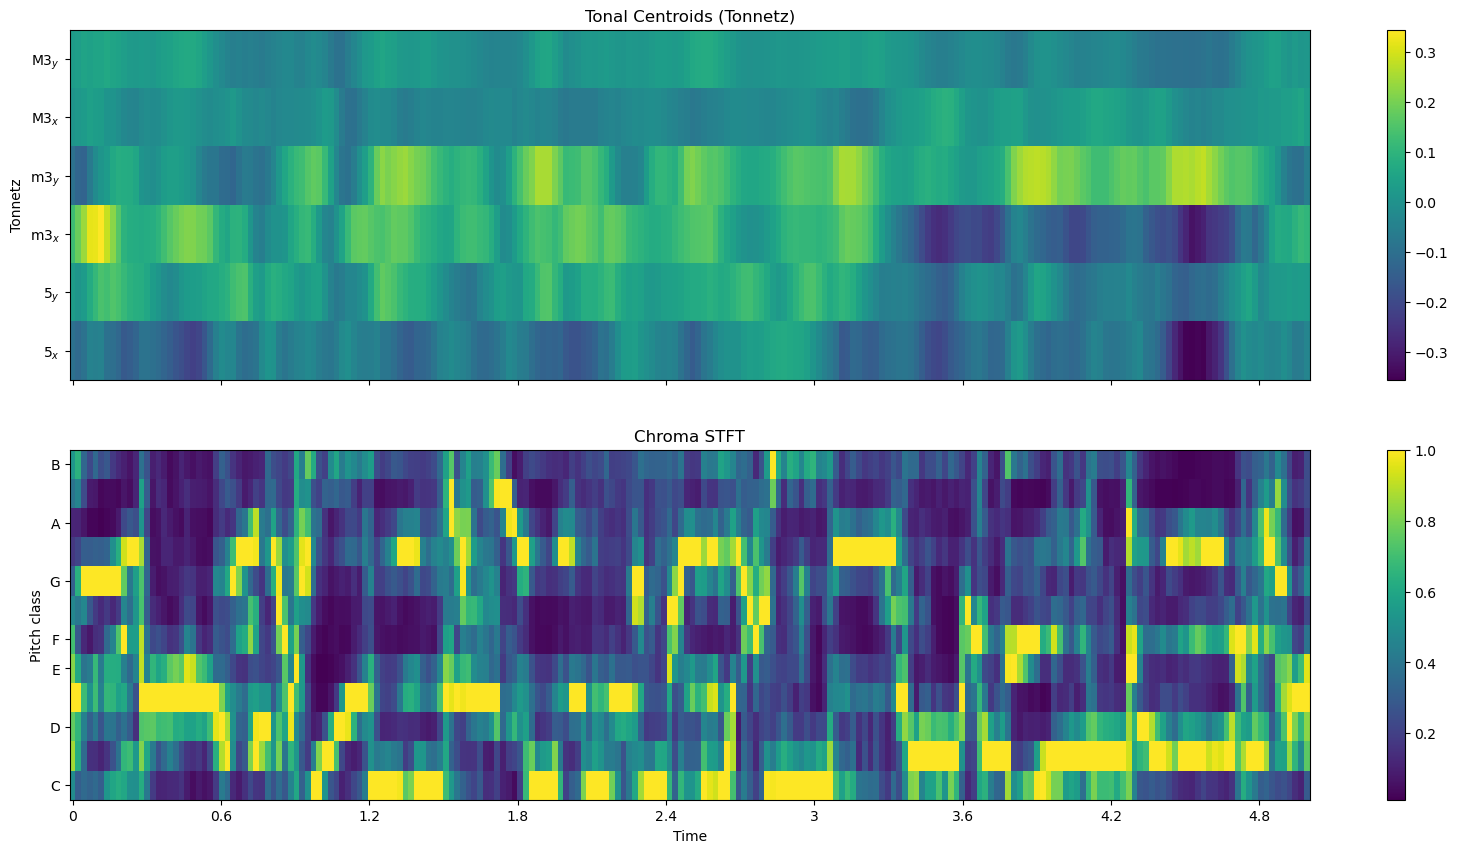

In [41]:
tonnetz = librosa.feature.tonnetz(y=y[:sr*5], sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
img1 = librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', ax=ax[0], cmap='viridis')
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_stft(y=y[:sr*5], sr=sr), y_axis='chroma', x_axis='time', ax=ax[1], cmap='viridis')
ax[1].set(title='Chroma STFT')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

plt.savefig('./visualizations/tonnetz-compared-with-chroma-stft')
plt.show()

## Chroma CQT

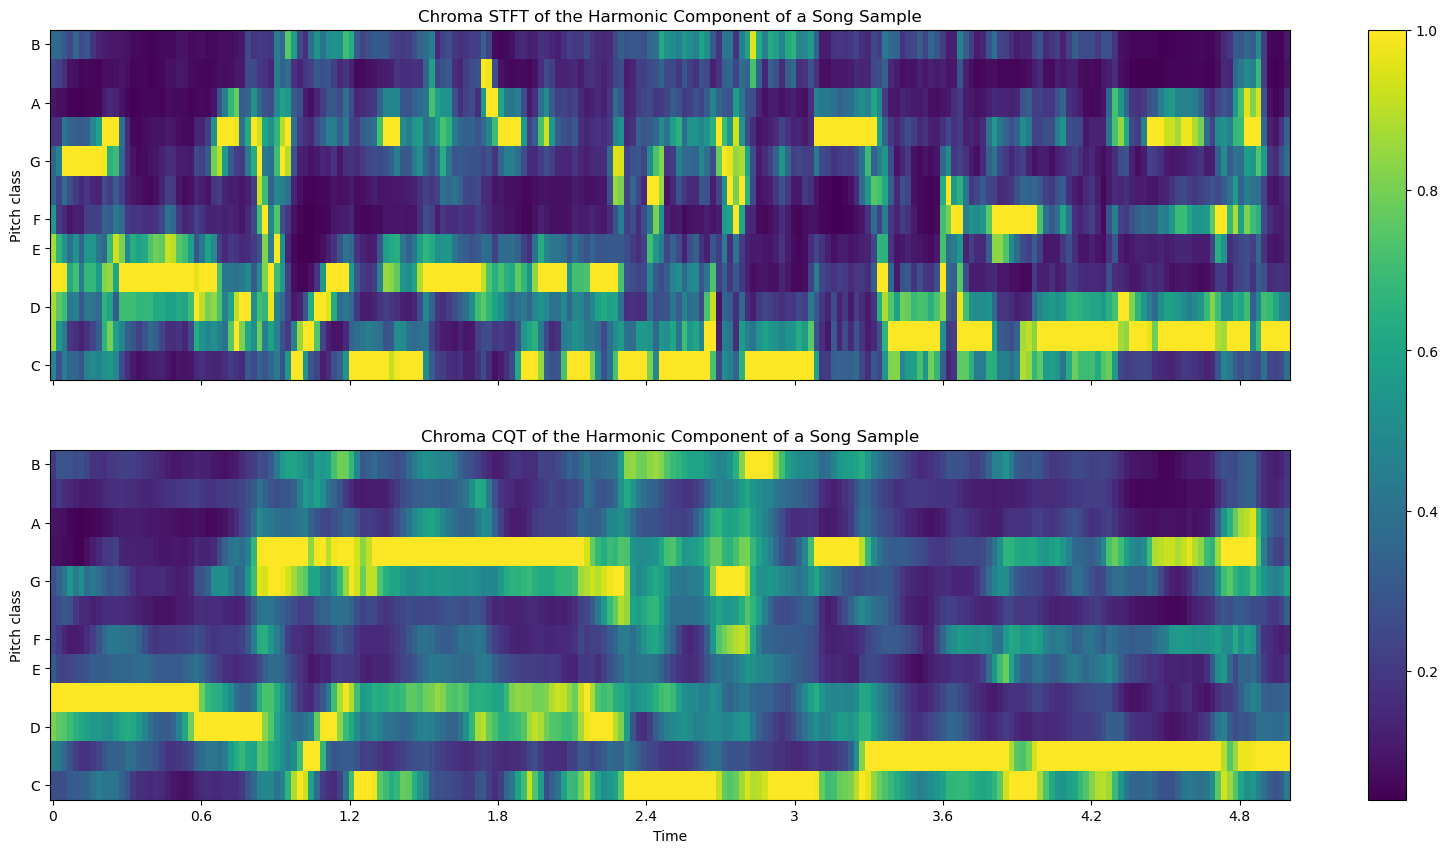

In [40]:
harmonic, percussive = librosa.effects.hpss(y=y[:sr*5])
chroma_stft = librosa.feature.chroma_stft(y=harmonic)
chroma_cqt = librosa.feature.chroma_cqt(y=harmonic)
#percussive_tempo, _ = librosa.beat.beat_track(y=percussive)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(20,10))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0], cmap='viridis')
ax[0].set(title='Chroma STFT of the Harmonic Component of a Song Sample')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time', ax=ax[1], cmap='viridis')
ax[1].set(title='Chroma CQT of the Harmonic Component of a Song Sample')
fig.colorbar(img, ax=ax)

plt.savefig('./visualizations/chroma-cqt-vs-chroma-stft')